# The Yeast in a Culture
Logistic population growth model

## The data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("mm.mplstyle")

In [2]:
time = np.arange(19)

In [3]:
observed = np.array([9.6,
18.3,
29.0,
47.2,
71.1,
119.1,
174.6,
257.3,
350.7,
441.0,
513.3,
559.7,
594.8,
629.4,
640.8,
651.1,
655.9,
659.6,
661.8])

## Ploting the data

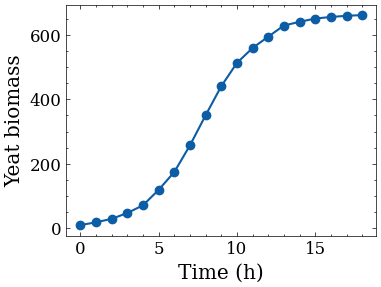

In [4]:
plt.plot(time, observed, marker="o")
plt.xlabel("Time (h)")
plt.ylabel("Yeat biomass")
plt.show()

## Run the simulation

In [5]:
p0 = 9.6
p_list = [p0]
for i in range(len(time)-1):
    p = p_list[-1] + 0.00082 * (665 - p_list[-1]) * p_list[-1]
    p_list.append(p)
p_list

[9.6,
 14.7593088,
 22.628933387711918,
 34.548594490493514,
 52.40918665351941,
 78.73560340222312,
 116.5867058381034,
 169.0156193495132,
 237.75548732184114,
 321.05086372209126,
 411.599500890453,
 497.12510643673556,
 565.5580623879042,
 611.6750178238208,
 638.4214165507376,
 652.3354528051215,
 659.1099099708547,
 662.2933276720954,
 663.7632687109275]

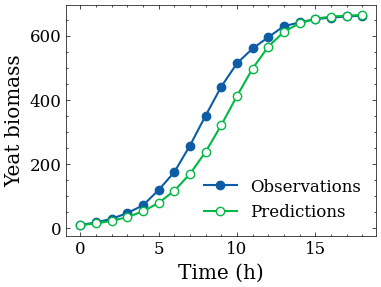

In [6]:
plt.plot(time, observed, marker="o", label="Observations")
plt.plot(time, p_list, marker="o", markerfacecolor="white", label="Predictions")
plt.legend()
plt.xlabel("Time (h)")
plt.ylabel("Yeat biomass")
plt.show()

## Linear least squares fit

In [7]:
M = 665
P = observed

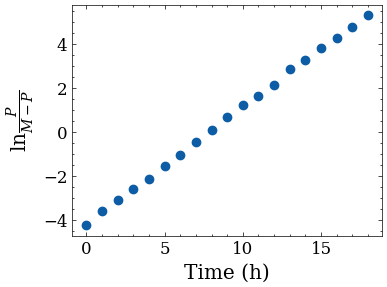

In [8]:
plt.scatter(time, np.log(P/(M-P)), marker="o")
plt.xlabel("Time (h)")
plt.ylabel(r"${\rm{ln}}\frac{P}{M-P}$")
plt.show()

In [9]:
# first try numpy polyfit
slope, intercept = np.polyfit(time, np.log(P/(M-P)), deg=1)
slope, intercept

(np.float64(0.5306746627219533), np.float64(-4.163572101473056))

Why is it different from the textbook? I have no idea!

In [10]:
# then scipy linear regression
import scipy

In [11]:
scipy.stats.linregress(time, np.log(P/(M-P)))

LinregressResult(slope=np.float64(0.5306746627219531), intercept=np.float64(-4.163572101473055), rvalue=np.float64(0.9998025122201444), pvalue=np.float64(2.2433224210480064e-30), stderr=np.float64(0.0025583109916853066), intercept_stderr=np.float64(0.02695347880051371))

In [12]:
r = slope / M
r

np.float64(0.0007980070116119599)

In [13]:
P0 = M / (1 + np.exp(-intercept))
P0

np.float64(10.183642179795761)

## Make predictions

In [14]:
P_pred = M * P0 / (P0 + (M-P0) * np.exp(-r*M*time))

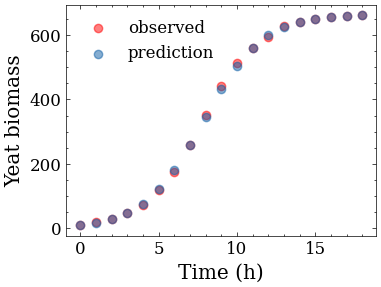

In [15]:
plt.scatter(time, P, alpha=0.5, color="red", label="observed")
plt.scatter(time, P_pred, alpha=0.5, label="prediction")
plt.xlabel("Time (h)")
plt.ylabel("Yeat biomass")
plt.legend()
plt.show()

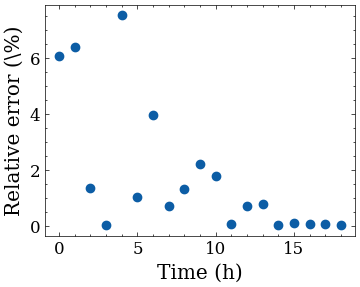

In [16]:
plt.scatter(time, np.abs((P-P_pred) / P) * 100)
plt.xlabel("Time (h)")
plt.ylabel(r"Relative error (\%)")
plt.show()

## Problems
- What about slightly different values of the slope and interception?
- How to obtain the values of the population at continuous time?